# CHAPTER 01 - Introduction to Time Series
---

## 0.0. Imports

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib           import pyplot as plt
from IPython.core.display import HTML
from IPython.display      import Image

%matplotlib inline

## 0.1. Helper Functions

In [7]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [9]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 1.0. Monthly C02 Concentrations

In [10]:
data = pd.read_csv( '../../data/Monthly_CO2_Concentrations.csv', converters = {'Year': np.int32, 'Month': np.int32} )
data = data[['CO2', 'Year', 'Month']]
data['Date'] = data['Year'].astype( str ) + '-' + data['Month'].astype( str )

FileNotFoundError: [Errno 2] File b'../../data/Monthly_CO2_Concentrations.csv' does not exist: b'../../data/Monthly_CO2_Concentrations.csv'

In [11]:
data.head()

NameError: name 'data' is not defined

In [12]:
# remove all columns having missing values
data = data.loc[ (~pd.isnull( data['CO2'] ) ) & (~pd.isnull( data['Year'] ) ) & (~pd.isnull( data['Month'] ) ) ]
data = data.sort_values( ['Year', 'Month'] )

NameError: name 'data' is not defined

In [13]:
data.head()

NameError: name 'data' is not defined

In [14]:
plt.figure( figsize=(5.5, 5.5) )
data['CO2'].plot( color='b' )
plt.title( 'Monthly CO2 concentrations' )
plt.xlabel( 'Time' )
plt.ylabel( 'CO2 concentration' )
plt.xticks( rotation=30 );

NameError: name 'data' is not defined

<Figure size 396x396 with 0 Axes>

## 2.0. DJIA  

In [15]:
djia_df = pd.read_excel( '../../data/DJIA_Jan2016_Dec2016.xlsx' )
djia_df.head() 

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [16]:
g = sns.tsplot( djia_df['Close'] )
g.set_title( 'Dow Jones Industrial Average between Jan 2016 - Dec 2016' )
g.set_xlabel( 'Time' )
g.set_ylabel( 'Closing Value' )

NameError: name 'djia_df' is not defined

In [17]:
lag = np.arange( 0, 31 )
djia_acf = []
for l in lag:
    djia_acf.append( djia_df['Close'].autocorr(l) )

NameError: name 'djia_df' is not defined

In [18]:
g = sns.pointplot( x=lag, y=djia_acf, markers='.' )
g.set_title( 'Autocorrelation function of DJIA' );
g.set_xlabel( 'Lag in terms of number of trading days' );
g.set_ylabel( 'Autocorrelation function' );
g.set_xticklabels( lag, rotation=90 );

ValueError: Grouper and axis must be same length

# CHAPTER 02 - Understanding Time Series Data
---

In [19]:
import os
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv( '../data/chemical-concentration-readings.csv' ) 

FileNotFoundError: [Errno 2] File b'../data/chemical-concentration-readings.csv' does not exist: b'../data/chemical-concentration-readings.csv'

In [21]:
print( 'Shape of the dataset:', df.shape )
df.head( 10 )

NameError: name 'df' is not defined

In [22]:
datetime_rowid = df['Timestamp'].map( lambda t: pd.to_datetime( t, format='%Y-%m-%d %H:%M:%S' ) )
df.index = datetime_rowid
df.head( 10 )

NameError: name 'df' is not defined

In [23]:
daily = df['Chemical conc.'].resample( 'D' )
daily_mean = daily.mean()

NameError: name 'df' is not defined

NameError: name 'df' is not defined

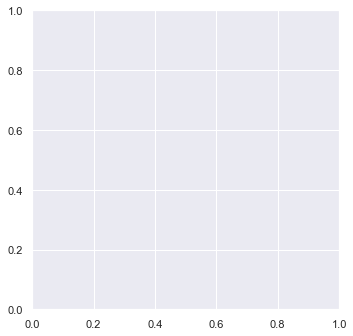

In [24]:
fig = plt.figure( figsize=(5.5, 5.5) )
ax = fig.add_subplot( 1, 1, 1 )
df['Chemical conc.'].plot( ax=ax, color='b' )
daily_mean.plot( ax=ax, color='r' )

# CHAPTER 04 - Auto-Regressive Models
---

In [42]:
import numpy as np
import statsmodels.tsa.api as smtsa

from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [43]:
def plotds( xt, nlag=30, fig_size=(12, 10) ):
    if not isinstance( xt, pd.Series ):
        xt = pd.Series( xt )
        
    fig_plt = plt.figure( figsize=fig_size )
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid( layout, (0, 0), colspan=2 )
    ax_acf = plt.subplot2grid( layout, (1, 0) )
    ax_pacf = plt.subplot2grid( layout, (1, 1) )
    
    # Plot graphs
    xt.plot( ax=ax_xt )
    ax_xt.set_title( 'Time Series' )
    plot_acf( xt, lags=50, ax=ax_acf )
    plot_pacf( xt, lags=50, ax=ax_pacf )
    plt.tight_layout()
    
    return None

## 4.1. Auto-regressive models

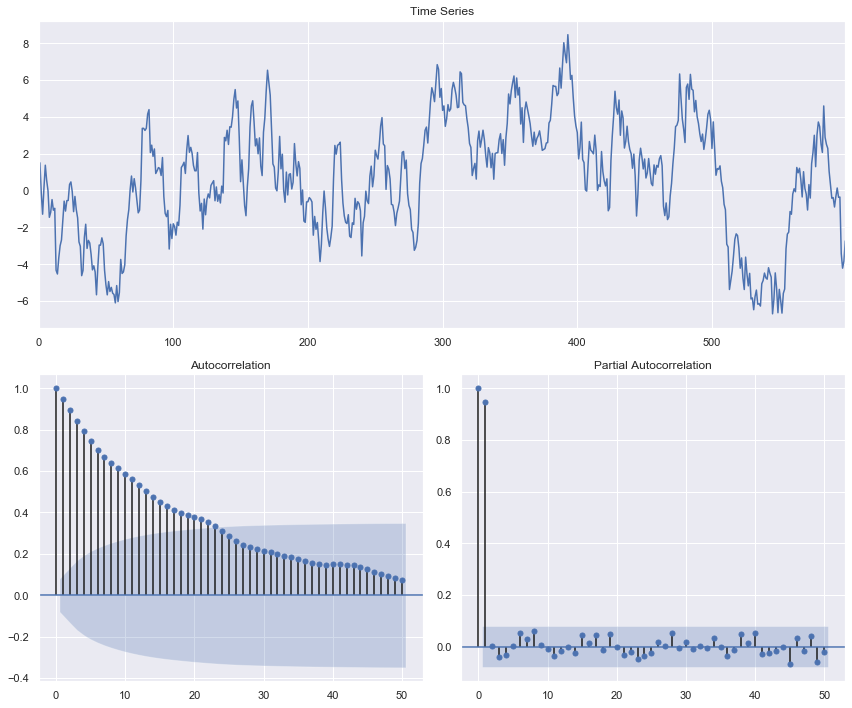

In [52]:
# Number o samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]

ar1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar1_data )

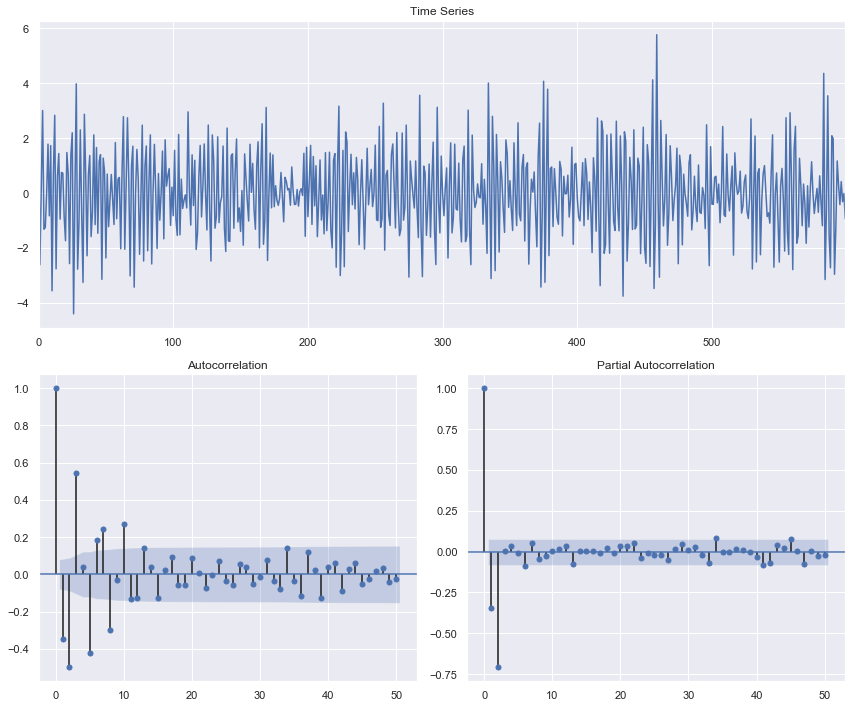

In [53]:
# Generate AR(2) dataset
n = 600
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]

ar2_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar2_data )

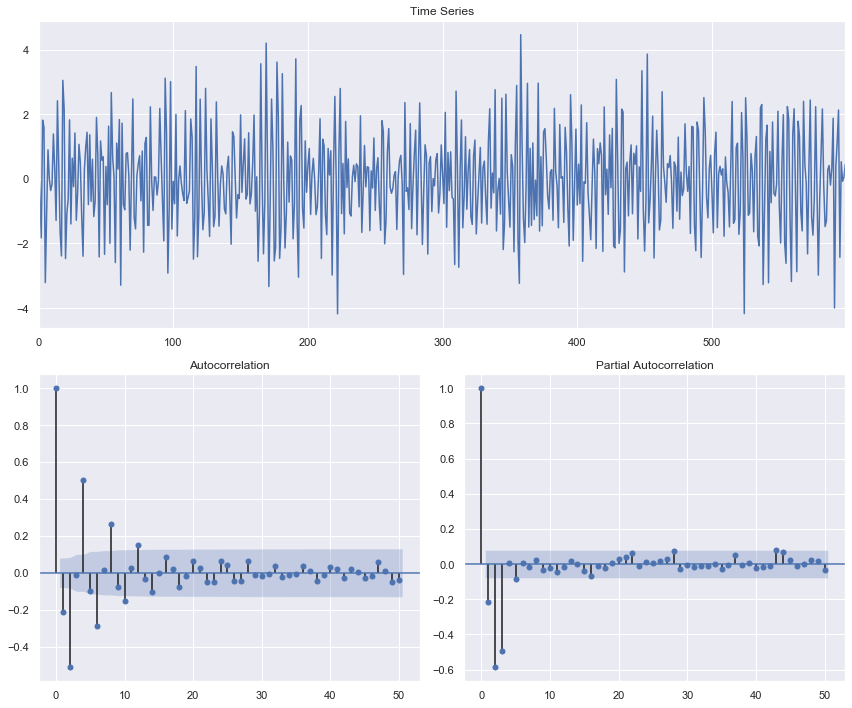

In [54]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]

ar3_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ar3_data )

In [56]:
# Build AR(1) model
ar1model = smtsa.ARMA( ar1_data.tolist(), order=(1, 0) )
ar1 = ar1model.fit( maxlag=30, method='mle', trend='nc' )
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -851.154
Method:                           mle   S.D. of innovations              0.998
Date:                Mon, 25 Nov 2019   AIC                           1706.308
Time:                        07:45:48   BIC                           1715.101
Sample:                             0   HQIC                          1709.731
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9490      0.013     75.523      0.000       0.924       0.974
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0537           +0.0000j            1.0537            0.0000
-----------------------------------------------------------------------------
"""

In [58]:
# Build AR(3) model
ar3model = smtsa.ARMA( ar3_data.tolist(), order=(3, 0) )
ar3 = ar3model.fit( maxlag=30, method='mle', trend='nc' )
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -872.879
Method:                           mle   S.D. of innovations              1.035
Date:                Mon, 25 Nov 2019   AIC                           1753.758
Time:                        07:48:25   BIC                           1771.346
Sample:                             0   HQIC                          1760.604
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6248      0.036    -17.573      0.000      -0.695      -0.555
ar.L2.y       -0.7492      0.031    -24.063      0.000      -0.810      -0.688
ar.L3.y       -0.4900      0.035    -13.809      0.000      -0.560      -0.420
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0124           -1.1461j            1.1461           -0.2483
AR.2            0.0124           +1.1461j            1.1461            0.2483
AR.3           -1.5536           -0.0000j            1.5536           -0.5000
-----------------------------------------------------------------------------
"""

## 4.2. Moving Average Models

In [60]:
# MA models use dependency between residual errors to forecast values in the next time period.
# The model helps you adjust for any unpredictable events sucha as catastrophic events leading to a share market crash leasding to share price falling,
#     which will happen over time and is captured as moving average process.

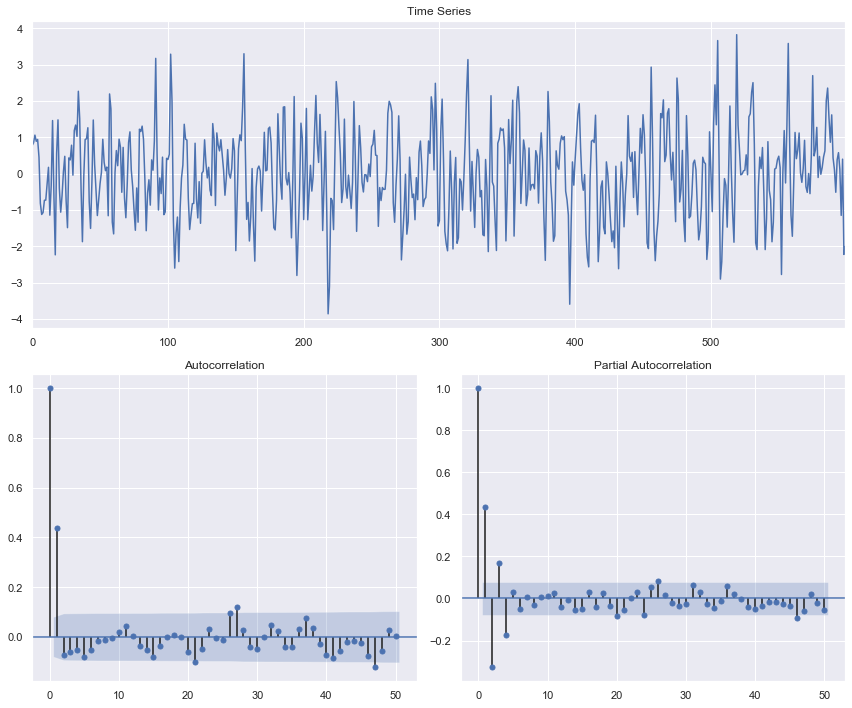

In [63]:
# Number of samples
n = 600

# Generate MA(1)
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma1_data )

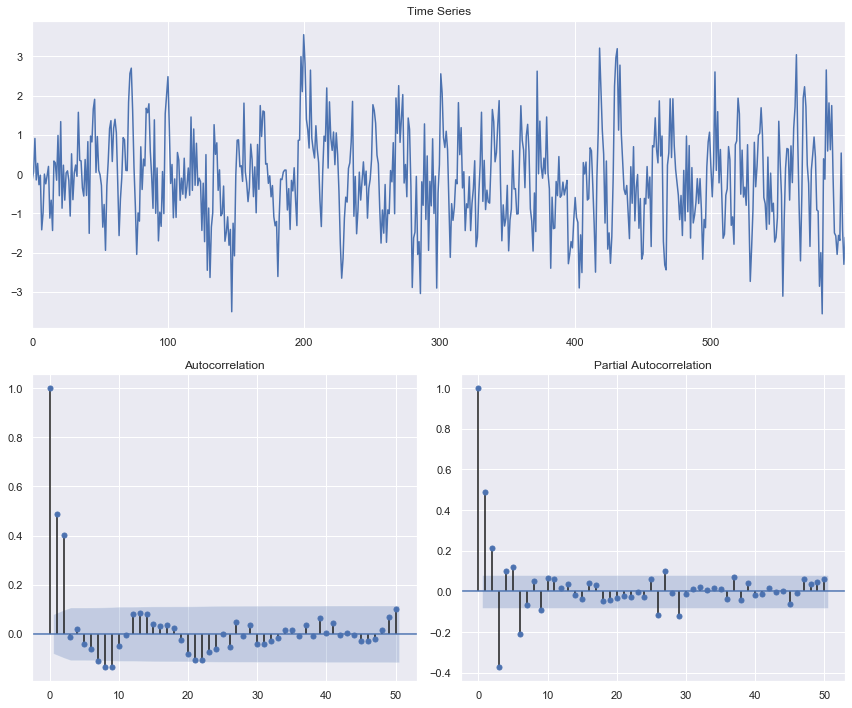

In [64]:
# Generate MA(2)
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma2_data )

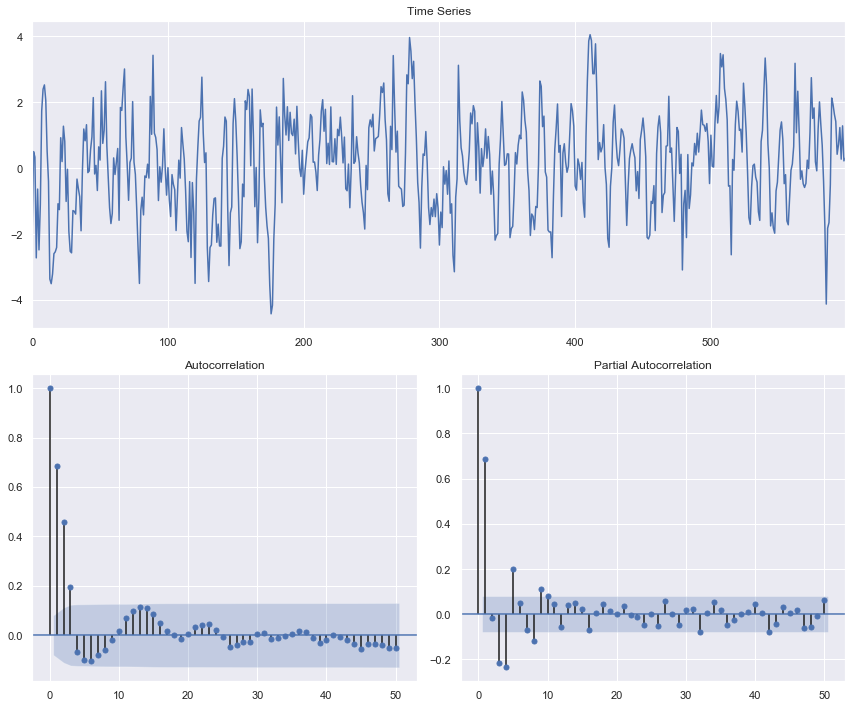

In [65]:
# Generate MA(3)
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample( ar=ar, ma=ma, nsample=n )
plotds( ma3_data )

In [66]:
# Build MA(1) model
ma1 = smtsa.ARMA( ma1_data.tolist(), order=(0, 1) ).fit( maxlag=30, method='mle', trend='nc' )
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -856.732
Method:                           mle   S.D. of innovations              1.008
Date:                Mon, 25 Nov 2019   AIC                           1717.465
Time:                        08:00:39   BIC                           1726.259
Sample:                             0   HQIC                          1720.888
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6843      0.029     23.421      0.000       0.627       0.742
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4614           +0.0000j            1.4614            0.5000
-----------------------------------------------------------------------------
"""

In [67]:
# Build MA(3) model
ma3 = smtsa.ARMA( ma3_data.tolist(), order=(0, 3) ).fit( maxlag=30, method='mle', trend='nc' )
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -843.195
Method:                           mle   S.D. of innovations              0.985
Date:                Mon, 25 Nov 2019   AIC                           1694.391
Time:                        08:01:42   BIC                           1711.979
Sample:                             0   HQIC                          1701.237
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6590      0.034     19.390      0.000       0.592       0.726
ma.L2.y        0.6724      0.031     21.583      0.000       0.611       0.733
ma.L3.y        0.5578      0.036     15.489      0.000       0.487       0.628
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0625           -1.1592j            1.1608           -0.2414
MA.2            0.0625           +1.1592j            1.1608            0.2414
MA.3           -1.3304           -0.0000j            1.3304           -0.5000
-----------------------------------------------------------------------------
"""

## 4.3. Building datasets with ARMA